# Intro to Keras
***

### Module 3
Setting up your first model
***

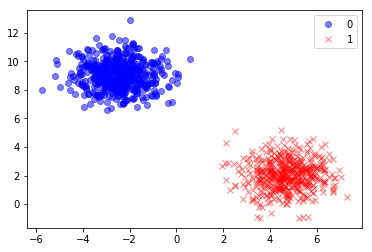

In [5]:
# Imports
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import os
#os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"
plot_model
# Helper functions

#   plot the data on a figure
def plot_data(pl, X, y):
    # plot class where y==0
    pl.plot(X[y==0, 0], X[y==0,1], 'ob', alpha=0.5)
    # plot class where y==1
    pl.plot(X[y==1, 0], X[y==1,1], 'xr', alpha=0.5)
    pl.legend(['0', '1'])
    return pl
    
#   Common function that draws the decision boundaries
def plot_decision_boundary(model, X, y):

    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # make prediction with the model and reshape the output so contourf can plot it
    c = model.predict(ab)
    Z = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    # plot the contour
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    # plot the moons of data
    plot_data(plt, X, y)

    return plt


# Generate some data blobs.  Data will be either 0 or 1 when 2 is number of centers.
# X is a [number of samples, 2] sized array. X[sample] contains its x,y position of the sample in the space
# ex: X[1] = [1.342, -2.3], X[2] = [-4.342, 2.12]
# y is a [number of samples] sized array. y[sample] contains the class index (ie. 0 or 1 when there are 2 centers)
# ex: y[1] = 0 , y[1] = 1
X, y = make_blobs(n_samples=1000, centers=2, random_state=42)

pl = plot_data(plt, X, y)
pl.show()

# Split the data into Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Epoch 1/100
700/700 [==============================] - 0s 277us/step - loss: 2.9511 - acc: 0.2014
Epoch 2/100
700/700 [==============================] - 0s 26us/step - loss: 0.3151 - acc: 0.8257
Epoch 3/100
700/700 [==============================] - 0s 26us/step - loss: 0.0378 - acc: 1.0000
Epoch 4/100
700/700 [==============================] - 0s 26us/step - loss: 0.0239 - acc: 1.0000
Epoch 5/100
700/700 [==============================] - 0s 23us/step - loss: 0.0188 - acc: 1.0000
Epoch 6/100
700/700 [==============================] - 0s 26us/step - loss: 0.0157 - acc: 1.0000
Epoch 7/100
700/700 [==============================] - 0s 26us/step - loss: 0.0135 - acc: 1.0000
Epoch 8/100
700/700 [==============================] - 0s 21us/step - loss: 0.0117 - acc: 1.0000
Epoch 9/100
700/700 [==============================] - 0s 29us/step - loss: 0.0103 - acc: 1.0000
Epoch 10/100
700/700 [==============================] - 0s 23us/step - loss: 0.0092 - acc: 1.0000
Epoch 11/100
700/700 [======

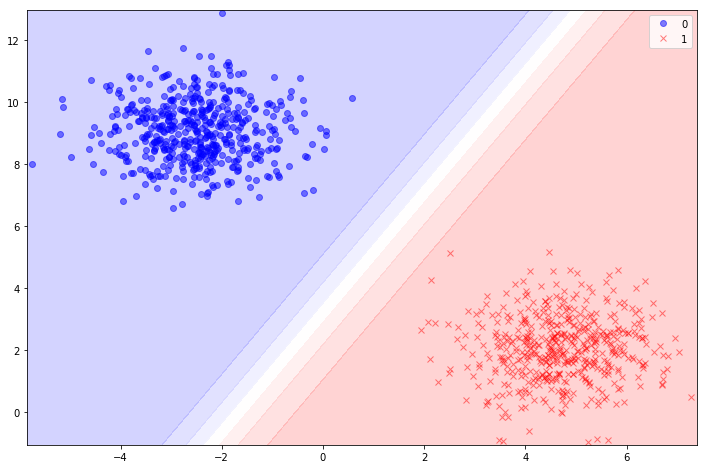

In [6]:
# Create the keras model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

#   Simple Sequential model
model = Sequential()
#   Add a Dense Fully Connected Layer with 1 neuron.  Using input_shape = (2,) says the input will 
#       be arrays of the form (*,2).  The first dimension will be an unspecified 
#       number of batches (rows) of data.  The second dimension is 2 which are the X, Y positions of each data element.
#       The sigmoid activation function is used to return 0 or 1, signifying the data 
#       cluster the position is predicted to belong to.
model.add(Dense(1, input_shape=(2,), activation="sigmoid"))
#   Compile the model.  Minimize crossentopy for a binary.  Maximize for accuracy
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
#   Fit the model with the data from make_blobs.  Make 100 cycles through the data.
#       Set verbose to 0 to supress progress messages 
model.fit(X_train, y_train, epochs=100, verbose=1)
#   Get loss and accuracy on test data
eval_result = model.evaluate(X_test, y_test)
#   Print test accuracy
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])
#   Plot the decision boundary
plot_decision_boundary(model, X, y).show()

### Module 4
Constructing models
* Sequential Model
* Functional Model
* Hidden layers
* Early stopping function
* Persisting the model
***

In [ ]:
"""
# Following steps required to resolve error on Windows: 
#   ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

# Install GraphViz
# Install pydot module
# Run following code to append GraphViz to PATH variable
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

"""

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
Hidden-1 (Dense)             (None, 4)                 12        
_________________________________________________________________
Hidden-2 (Dense)             (None, 4)                 20        
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________
Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 [==============================] - 0s 495us/step - loss: 0.7016 - acc: 0.5371 - val_loss: 0.6858 - val_acc: 0.5633
Epoch 2/100
700/700 [==============================] - 0s 34us/step - loss: 0.6706 - acc: 0.6529 

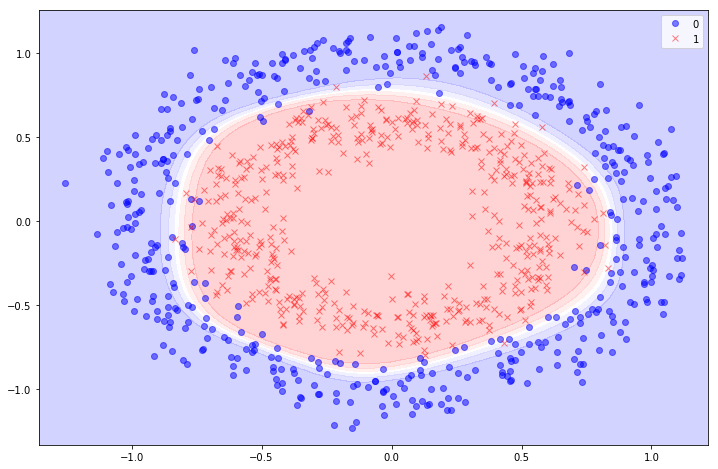

In [4]:
#   deep_circles.py
#   Defines a network that can find separate circles of data
#

#   Imports
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"

#   Helper functions

#   plot the data on a figure
def plot_data(pl, X, y):
    # plot class where y==0
    pl.plot(X[y==0, 0], X[y==0,1], 'ob', alpha=0.5)
    # plot class where y==1
    pl.plot(X[y==1, 0], X[y==1,1], 'xr', alpha=0.5)
    pl.legend(['0', '1'])
    return pl

#   Common function that draws the decision boundaries
def plot_decision_boundary(model, X, y):

    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # make prediction with the model and reshape the output so contourf can plot it
    c = model.predict(ab)
    Z = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    # plot the contour
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    # plot the moons of data
    plot_data(plt, X, y)

    return plt


# Generate some data blobs.  Data will be either 0 or 1 when 2 is number of centers.
# X is a [number of samples, 2] sized array. X[sample] contains its x,y position of the sample in the space
# ex: X[1] = [1.342, -2.3], X[2] = [-4.342, 2.12]
# y is a [number of samples] sized array. y[sample] contains the class index (ie. 0 or 1 when there are 2 centers)
# ex: y[1] = 0 , y[1] = 1
X, y = make_circles(n_samples=1000, factor=.6, noise=0.1, random_state=42)
#pl = plot_data(plt, X, y)
#pl.show()

# Split the data into Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the keras model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# #   Simple Sequential model
# model = Sequential()
# model.add(Dense(4, input_shape=(2,), activation="tanh", name="Hidden-1"))
# model.add(Dense(4, activation="tanh", name="Hidden-2"))

# #   Add a Dense Fully Connected Layer with 1 neuron.  Using input_shape = (2,) says the input will 
# #       be arrays of the form (*,2).  The first dimension will be an unspecified 
# #       number of batches (rows) of data.  The second dimension is 2 which are the X, Y positions of each data element.
# #       The sigmoid activation function is used to return 0 or 1, signifying the data 
# #       cluster the position is predicted to belong to.
# model.add(Dense(1, activation="sigmoid", name="output_layer"))
# model.summary()

# #   Compile the model.  Minimize crossentopy for a binary.  Maximize for accuracy
# model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
# from tensorflow.keras.utils import plot_model
# plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

# #   Define early stopping callback
# from tensorflow.keras.callbacks import EarlyStopping
# my_callbacks = [EarlyStopping(monitor='val_acc', patience=5, mode='max')]

# #   Fit the model with the data from make_blobs.  Make 100 cycles through the data.
# #       Set verbose to 0 to supress progress messages 
# model.fit(X_train, y_train, epochs=100, verbose=1, callbacks=my_callbacks, validation_data=(X_test, y_test))

# #   Get loss and accuracy on test data
# eval_result = model.evaluate(X_test, y_test)

# #   Print test accuracy
# print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])

# #   Plot the decision boundary
# plot_decision_boundary(model, X, y).show()

#   Implement as Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
#
inputs = Input(shape=(2,))
#   Hidden layers
x = Dense(4, activation="tanh",  name="Hidden-1")(inputs)
x = Dense(4, activation="tanh", name="Hidden-2")(x)
#   Output Layer
o = Dense(1, activation="sigmoid", name="Output_layer")(x)
#   Create Model and specify the input and output
model = Model(inputs=inputs, outputs=o)
#   Display summary
model.summary()
#   Compile the model.  Minimize crossentopy for a binary.  Maximize for accuracy
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)
#   Define early stopping callback
from tensorflow.keras.callbacks import EarlyStopping
my_callbacks = [EarlyStopping(monitor='val_acc', patience=5, mode='max')]
#   Fit the model with the data.  Make 100 cycles through the data.
#       Set verbose to 0 to supress progress messages 
model.fit(X_train, y_train, epochs=100, verbose=1, callbacks=my_callbacks, validation_data=(X_test, y_test) )
#   Get loss and accuracy on test data
eval_result = model.evaluate(X_test, y_test)
#   Print test accuracy
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])
#   Plot the decision boundary
plot_decision_boundary(model, X, y).show()

#################
# Persist model #
#################
# Save model to file
model.save('modelPath')
tensorflow.keras.models.load_model('modelPath')

#Save model to json or yaml file
model.to_json('modelPath')
tensorflow.keras.models.model_from_json('modelPath')
model.to_yaml('modelPath')
tensorflow.keras.models.model_from_yaml('modelPath')

# Save model weights only
model.save_weights('modelPath')
model.load_weights('modelPath')

300/300 [==============================] - 0s 273us/step


Test loss: 0.0012747081508859993 Test accuracy: 1.0


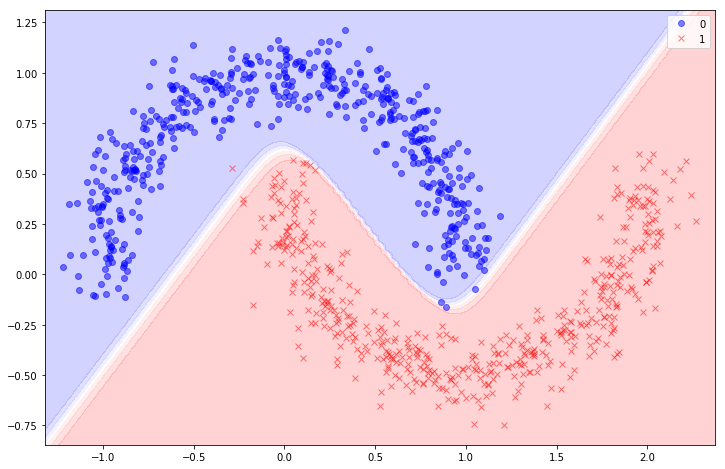

In [9]:
#   deep_moon.py
#   Defines a network that can find separate data of moon shapes
#

#   Imports
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb                 # make plot look pretty

# Helper functions
#   plot the moons only on a figure
def plot_moons(pl, X, y):
    # plot half moon for class where y==0
    pl.plot(X[y==0, 0], X[y==0,1], 'ob', alpha=0.5)
    # plot half moon for class where y==1
    pl.plot(X[y==1, 0], X[y==1,1], 'xr', alpha=0.5)
    pl.legend(['0', '1'])
    return pl
    
    


#   plot_decision_boundry - MIT Licensed function to nicely plot decision boundary 
# def plot_decision_boundary(model, X, y):

#     amin, bmin = X.min(axis=0) - 0.1
#     amax, bmax = X.max(axis=0) + 0.1
#     hticks = np.linspace(amin, amax, 101)
#     vticks = np.linspace(bmin, bmax, 101)
#     xx, yy = np.meshgrid(hticks, vticks)
#     # Set min and max values and give it some padding
#     #x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
#     #y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
#     #h = 0.01
#     # Generate a grid of points with distance h between them
#     #xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#     # Predict the function value for the whole gid
#     Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

#     Z = Z.reshape(xx.shape)

#     # Plot the contour and training examples
#     plt.figure(figsize=(12,8))
#     plt.contourf(xx, yy, Z, cmap="bwr", alpha=0.2) # cmap=plt.cm.Spectral, alpha=0.3)
#     #plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
#     #plot_moons(plt, X, y)       # add the moons to the plot
#     plt.plot(X[y==0, 0], X[y==0,1], 'or', alpha=0.5)
#     plt.plot(X[y==1, 0], X[y==1,1], 'xb', alpha=0.5)
#     plt.legend(['0', '1'])
#     return plt

# #   from course
# def plot_decision_boundary(model, X, y):
#     amin, bmin = X.min(axis=0) - 0.1
#     amax, bmax = X.max(axis=0) + 0.1
#     print(amin, amax)
#     hticks = np.linspace(amin, amax, 101)
#     vticks = np.linspace(bmin, bmax, 101)
    
#     aa, bb = np.meshgrid(hticks, vticks)
#     ab = np.c_[aa.ravel(), bb.ravel()]
    
#     c = model.predict(ab)
#     cc = c.reshape(aa.shape)

#     plt.figure(figsize=(12, 8))
#     plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
#     plt.plot(X[y==0, 0], X[y==0, 1], 'or', alpha=0.5)
#     plt.plot(X[y==1, 0], X[y==1, 1], 'xb', alpha=0.5)
#     plt.legend(['0', '1'])
#     return plt

# def plot_decision_boundary(model, X, y):
#     amin, bmin = X.min(axis=0) - 0.1
#     amax, bmax = X.max(axis=0) + 0.1
#     print(amin, amax)
#     hticks = np.linspace(amin, amax, 101)
#     vticks = np.linspace(bmin, bmax, 101)
    
#     aa, bb = np.meshgrid(hticks, vticks)
#     ab = np.c_[aa.ravel(), bb.ravel()]
    
#     # make prediction with the model and reshape the output so contourf can plot it
#     print(ab)
#     c = model.predict(ab)
#     Z = c.reshape(aa.shape)
#     print("Z shape:", Z.shape)
#     print("Z:")
#     print(Z)

#     plt.figure(figsize=(12, 8))
#     # plot the contour
#     plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
#     plt.plot(X[y==0, 0], X[y==0, 1], 'or', alpha=0.5)
#     plt.plot(X[y==1, 0], X[y==1, 1], 'xb', alpha=0.5)
#     plt.legend(['0', '1'])
#     return plt

def plot_decision_boundary(model, X, y):

    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    # print("amin:", amin)
    # print("amax:", amax)
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # make prediction with the model and reshape the output so contourf can plot it
    # print("ab:", ab)
    c = model.predict(ab)
    Z = c.reshape(aa.shape)
    # print("Z shape:", Z.shape)
    # print("Z[0,]:")
    # print(Z[0,])

    plt.figure(figsize=(12, 8))
    # plot the contour
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    # plot the moons of data
    plot_moons(plt, X, y)

    return plt


# Generate some data moons.  Data will be either 0 or 1 and in two "cresent moon" shapes.
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
#pl = plot_moons(plt, X, y)
#pl.show()

# Split the data into Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the keras model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1 Hidden Layer Model
#   Simple Sequential model
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation="tanh"))
model.add(Dense(2, activation="tanh"))
#   Add a Dense Fully Connected Layer with 1 neuron and the sigmoid activation function
#   return 0 or 1 signifying which moon the predicted value belongs to
model.add(Dense(1, activation="sigmoid"))
#   compile the model.  Minimize crossentopy for a binary.  Maximize accuracy
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
#   fit the model with the data from make_moons
model.fit(X_train, y_train, epochs=100, verbose=0)

#   Get loss and accuracy on test data
eval_result = model.evaluate(X_test, y_test)
#   Print test accuracy
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])

plot_decision_boundary(model, X, y).show()


# # 2 Deeper Sequential model
# model = Sequential()
# #   Add a Dense Layer with 4 neurons and the tanh activation function
# model.add(Dense(4, input_shape=(2,), activation="tanh"))
# #   Add a Dense Layer with 2 neurons and the tanh activation function
# model.add(Dense(2, activation="tanh"))
# #   Add a Dense Layer with 1 nueron and the sigmoid activation function
# model.add(Dense(1,  activation="sigmoid"))

# #   compile the model.  Minimize crossentopy for a binary.  Maximize accuracy
# model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
# #   fit the model with the data from make_moons
# model.fit(X_train, y_train, epochs=100, verbose=0)

# #   Get loss and accuracy on test data
# eval_result = model.evaluate(X_test, y_test)
# #   Print test accuracy
# print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])

# plot_decision_boundary(model, X, y).show()


### Module 5
Employing layers (see notes)

### Module 6
Convolutional Neural Networks

Train on 60000 samples, validate on 10000 samples
Epoch 1/24
60000/60000 [==============================] - 1351s 23ms/step - loss: 0.5659 - acc: 0.7975 - val_loss: 0.3736 - val_acc: 0.8672
Epoch 2/24
60000/60000 [==============================] - 1358s 23ms/step - loss: 0.3630 - acc: 0.8701 - val_loss: 0.3074 - val_acc: 0.8872
Epoch 3/24
60000/60000 [==============================] - 1341s 22ms/step - loss: 0.3102 - acc: 0.8886 - val_loss: 0.2773 - val_acc: 0.8992
Epoch 4/24
60000/60000 [==============================] - 1327s 22ms/step - loss: 0.2784 - acc: 0.9002 - val_loss: 0.2659 - val_acc: 0.9048
Epoch 5/24
60000/60000 [==============================] - 1338s 22ms/step - loss: 0.2531 - acc: 0.9094 - val_loss: 0.2479 - val_acc: 0.9085
Epoch 6/24
60000/60000 [==============================] - 1381s 23ms/step - loss: 0.2352 - acc: 0.9166 - val_loss: 0.2309 - val_acc: 0.9158
Epoch 7/24
60000/60000 [==============================] - 1353s 23ms/step - loss: 0.2185 - acc: 0.9211 - val_l

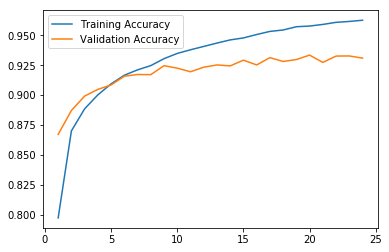

In [ ]:
#   Train a ConvNet on the MNIST fashion data.  This data consists of 10 classes of fashion images such
#   as shorts, dresses, shoes, purses, etc.  These images replace the handwritten digits in the classic MNIST dataset.
#   This change makes it harder to get a high score and more closely reflects real world usage of image 
#   classification.  And at the same time, is still small enough for the average PC to train in a short time.
# See https://github.com/zalandoresearch/fashion-mnist for information and code on Fashion MNIST

# This code is based on MNIST example found at Keras.io

from __future__ import print_function
import tensorflow.keras
from tensorflow.keras.datasets import fashion_mnist  # new with Keras 2.1.2.  Yah!!
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

#   Supress warning and informational messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# Number of classes - do not change unless the data changes
num_classes = 10

# sizes of batch and # of epochs of data
batch_size = 128
epochs = 24

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()  

#   Deal with format issues between different backends.  Some put the # of channels in the image before the width and height of image.
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = X_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#   Type convert and scale the test and training data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
#print('x_train shape:', x_train.shape)
#print('x_test shape:', x_test.shape)

#print(y_train[:4])
# convert class vectors to binary class matrices.  One-hot encoding
#  3 => 0 0 0 1 0 0 0 0 0 0 and 1 => 0 1 0 0 0 0 0 0 0 0 
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)
#print(y_train[:4])   # verify one-hot encoding

# Define the model
model = Sequential()
# V1
# model.add(Conv2D(32, kernel_size=(3, 3),
#                  activation='relu',
#                  input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))

# V2
# model.add(Conv2D(32, kernel_size=(3, 3),
#                  activation='relu',
#                  input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))


# #V3
# model.add(Conv2D(32, kernel_size=(3, 3),
#                  activation='relu',
#                  input_shape=input_shape))
# #model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))

# #V3 
# model.add(Conv2D(64, kernel_size=(3, 3),
#                  activation='relu',
#                  input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))

#V4 - remove 1st max pool
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


#   define compile to minimize categorical loss, use ada delta optimized, and optimize to maximizing accuracy
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#   Train the model and test/validate the mode with the test data after each cycle (epoch) through the training data
#   Return history of loss and accuracy for each epoch
hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

#   Evaluate the model with the test data to get the scores on "real" data.
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#   Plot data to see relationships in training and validation data
import numpy as np
import matplotlib.pyplot as plt
epoch_list = list(range(1, len(hist.history['acc']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list, hist.history['acc'], epoch_list, hist.history['val_acc'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()

In [2]:
%%time
# transfer_learn.py
# This program is an example of using Transfer Learning.  Transfer learning let apply the power of an existing powerful
# trained model to a dataset we are interested in.   In this example, we will use the Inveption-V3 model 
# This code was inspired by the post https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

# Cat and dog images can be found in the file train.zip found at  https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data.  
# create a folder named data.  Under that folder create the subfolders "train" and "validate"
# Copy 1000 "cat" files to the data/train/cat folder, 1000 "dog" files to the data/train/dog folder.
# Copy 400 different "cat" files to the data/validate/cat folder, 400 different "dog" files to the data/validate/dog folder.

import os

from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

# Suppress warning and informational messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Get count of number of files in this folder and all subfolders
def get_num_files(path):
    if not os.path.exists(path):
        return 0
    return sum([len(files) for r, d, files in os.walk(path)])

# Get count of number of subfolders directly below the folder in path
def get_num_subfolders(path):
    if not os.path.exists(path):
        return 0
    return sum([len(d) for r, d, files in os.walk(path)])

#   Define image generators that will create variations of image with the image rotated slightly, shifted up, down, left, or right, 
#     sheared, zoomed in, or flipped horizontally on the vertical axis (ie. person looking to the left ends up looking to the right)
def create_img_generator():
    return  ImageDataGenerator(
        preprocessing_function=preprocess_input,
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )

# Main Code
Image_width, Image_height = 299, 299 
Training_Epochs = 2
Batch_Size = 32
Number_FC_Neurons = 1024

train_dir = './data/train'
validate_dir = './data/validate'
num_train_samples = get_num_files(train_dir) 
num_classes = get_num_subfolders(train_dir)
num_validate_samples = get_num_files(validate_dir)
num_epoch = Training_Epochs
batch_size = Batch_Size

# Define data pre-processing 
#   Define image generators for training and testing 
train_image_gen = create_img_generator()
test_image_gen = create_img_generator()

#   Connect the image generator to a folder contains the source images the image generator alters.  
#   Training image generator
train_generator = train_image_gen.flow_from_directory(
  train_dir,
  target_size=(Image_width, Image_height),
  batch_size=batch_size,
  seed = 42    #set seed for reproducability
)

#   Validation image generator
validation_generator = test_image_gen.flow_from_directory(
  validate_dir,
  target_size=(Image_width, Image_height),
  batch_size=batch_size,
  seed=42       #set seed for reproducability
)

# Load the Inception V3 model and load it with it's pre-trained weights.  But exclude the final 
#    Fully Connected layer
InceptionV3_base_model = InceptionV3(weights='imagenet', include_top=False) #include_top=False excludes final FC layer
print('Inception v3 base model without last FC loaded')
#print(InceptionV3_base_model.summary())     # display the Inception V3 model hierarchy

# Define the layers in the new classification prediction 
x = InceptionV3_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(Number_FC_Neurons, activation='relu')(x)        # new FC layer, random init
predictions = Dense(num_classes, activation='softmax')(x)  # new softmax layer

# Define trainable model which links input from the Inception V3 base model to the new classification prediction layers
model = Model(inputs=InceptionV3_base_model.input, outputs=predictions)

# print model structure diagram
print (model.summary())

# Option 1: Basic Transfer Learning
print ('\nPerforming Transfer Learning')
  #   Freeze all layers in the Inception V3 base model 
for layer in InceptionV3_base_model.layers:
    layer.trainable = False
#   Define model compile for basic Transfer Learning
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the transfer learning model to the data from the generators.  
# By using generators we can ask continue to request sample images and the generators will pull images from 
# the training or validation folders and alter them slightly
history_transfer_learning = model.fit_generator(
  train_generator,
  epochs=num_epoch,
  steps_per_epoch = num_train_samples // batch_size,
  validation_data=validation_generator,
  validation_steps = num_validate_samples // batch_size,
  class_weight='auto')

# Save transfer learning model
model.save('inceptionv3-transfer-learning.model')

# Option 2: Transfer Learning with Fine-tuning - retrain the end few layers (called the top layers) of the inception model
print('\nFine tuning existing model')
#   Freeze 
Layers_To_Freeze = 172
for layer in model.layers[:Layers_To_Freeze]:
    layer.trainable = False
for layer in model.layers[Layers_To_Freeze:]:
    layer.trainable = True
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the Fine-tuning model to the data from the generators.  
# By using generators we can ask continue to request sample images and the generators will pull images from the training or validation
# folders, alter then slightly, and pass the images back
history_fine_tune = model.fit_generator(
  train_generator,
  steps_per_epoch = num_train_samples // batch_size,
  epochs=num_epoch,
  validation_data=validation_generator,
  validation_steps = num_validate_samples // batch_size,
    class_weight='auto')

# Save fine tuned model
model.save('inceptionv3-fine-tune.model')


C:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
87916544/87910968 [==============================] - 12s 0us/step
Inception v3 base model without last FC loaded
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (

### Module 7
Recurrent Neural Networks

In [4]:
%%time
#   This program will classify reviews from IMDB based on sentiment, positive or
#   negative.  We will used the IMDB database that comes with tensorflow.keras. 
#   This data has already preprocessed the reviews.  This preprocessing 
#   replaces the actual works with the encoding.  So the second most 
#   popular word is replaced by 2, third most popular by 3, etc.    

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import imdb

#   Supress warning and informational messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

#   Set parameters for data to use
NUM_WORDS = 6000        # the top most n frequent words to consider
SKIP_TOP = 2            # Skip the top most words that are likely (the, and, a)
MAX_REVIEW_LEN = 100    # Max number of words from a review.

#   Load pre-processed sentiment classified review data from IMDB Database
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = NUM_WORDS,
                                        skip_top=SKIP_TOP)
#   Print a sample
#  returns word index vector (ex. [2, 4, 2, 2, 33, 2804, ...]) and class (0 or 1) 
print("encoded word sequence:", x_train[3], "class:", y_train[3])  


#   Pad and truncate the review word sequences so they are all the same length
x_train = sequence.pad_sequences(x_train, maxlen = MAX_REVIEW_LEN)
x_test = sequence.pad_sequences(x_test, maxlen = MAX_REVIEW_LEN)
print('x_train.shape:', x_train.shape, 'x_test.shape:', x_test.shape)

#   The Model
model = Sequential()
model.add(Embedding(NUM_WORDS, 64 ))
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(1, activation='sigmoid'))

#   Compile
model.compile(loss='binary_crossentropy',  
            optimizer='adam',              
            metrics=['accuracy'])

#   Train
BATCH_SIZE = 24
EPOCHS = 5
cbk_early_stopping = EarlyStopping(monitor='val_acc', patience=2, mode='max')
model.fit(x_train, y_train, BATCH_SIZE, epochs=EPOCHS, 
            validation_data=(x_test, y_test), 
            callbacks=[cbk_early_stopping] )

score, acc = model.evaluate(x_test, y_test,
                            batch_size=BATCH_SIZE)
print('test score:', score, ' test accuracy:', acc)

encoded word sequence: [2, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153, 103, 4, 1494, 13, 70, 131, 67, 11, 61, 2, 744, 35, 3715, 761, 61, 5766, 452, 2, 4, 985, 7, 2, 59, 166, 4, 105, 216, 1239, 41, 1797, 9, 15, 7, 35, 744, 2413, 31, 8, 4, 687, 23, 4, 2, 2, 6, 3693, 42, 38, 39, 121, 59, 456, 10, 10, 7, 265, 12, 575, 111, 153, 159, 59, 16, 1447, 21, 25, 586, 482, 39, 4, 96, 59, 716, 12, 4, 172, 65, 9, 579, 11, 2, 4, 1615, 5, 2, 7, 5168, 17, 13, 2, 12, 19, 6, 464, 31, 314, 11, 2, 6, 719, 605, 11, 8, 202, 27, 310, 4, 3772, 3501, 8, 2722, 58, 10, 10, 537, 2116, 180, 40, 14, 413, 173, 7, 263, 112, 37, 152, 377, 4, 537, 263, 846, 579, 178, 54, 75, 71, 476, 36, 413, 263, 2504, 182, 5, 17, 75, 2306, 922, 36, 279, 131, 2895, 17, 2867, 42, 17, 35, 921, 2, 192, 5, 1219, 3890, 19, 2, 217, 4122, 1710, 537, 2, 1236, 5, 736, 10, 10, 61, 403, 9, 2, 40, 61, 4494, 5, 27, 4494, 159, 90, 263, 2311, 4319, 309, 8, 178, 5, 82, 4319, 4, 65, 15, 2, 145, 143, 5122, 12, 2, 537, 746, 537, 537, 15, 2, 4, 2, 594, 7, 5

C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 167s 7ms/step - loss: 0.6720 - acc: 0.5668 - val_loss: 0.6280 - val_acc: 0.6273
Epoch 2/5
25000/25000 [==============================] - 145s 6ms/step - loss: 0.5165 - acc: 0.7409 - val_loss: 0.4233 - val_acc: 0.8008
Epoch 3/5
25000/25000 [==============================] - 141s 6ms/step - loss: 0.4103 - acc: 0.8107 - val_loss: 0.3865 - val_acc: 0.8218
Epoch 4/5
25000/25000 [==============================] - 143s 6ms/step - loss: 0.3576 - acc: 0.8424 - val_loss: 0.3730 - val_acc: 0.8281
Epoch 5/5
25000/25000 [==============================] - 31s 1ms/step
test score: 0.36777327451109887  test accuracy: 0.8395999997138978
Wall time: 13min 4s


### Module 8
Specialty layers and functions

In [6]:
#   Demonstrates multiple input and output using the Functional API

from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

# Necessary for pydot
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

im = Input(shape=(100,200), name='input_main')    # Main Input
ls = LSTM(10, name='lstm_main')(im)
dl = Dense(5, activation='relu', name='dense_lstm')(ls)

ix = Input(shape=(5,), name='input_aux')             # Aux Input
cc = concatenate([dl, ix], name='d_lstm_and_aux_in')         
x = Dense(32, activation='relu', name='dm_out')(cc)    
mo = Dense(1, activation='sigmoid', name='main_out')(x)

ao = Dense(2, name='aux_out')(cc)

model = Model(inputs=[im, ix], 
                outputs=[mo, ao])

plot_model(model, to_file='model.png', show_shapes=False)

In [6]:
from xgboost import XGBClassifier

In [ ]:
clf = XGBClassifier()